In [1]:
from datasets import load_dataset

c:\Users\vlaxd\OneDrive\Рабочий стол\4_course\hse-personal-data-anonymisation\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
runne_dataset_link = "iluvvatar/RuNNE"

In [3]:
runne_dataset = load_dataset(runne_dataset_link, trust_remote_code=True)
runne_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'entities'],
        num_rows: 461
    })
    test: Dataset({
        features: ['id', 'text', 'entities'],
        num_rows: 93
    })
    dev: Dataset({
        features: ['id', 'text', 'entities'],
        num_rows: 323
    })
})

In [87]:
def format_runne_dataset(dataset):
    
    result_dataset = []
    for row in dataset:
        text_entities = {'entities':[]}
        for entity in row['entities']:
            entity_split = entity.split()
            start_char = int(entity_split[0])
            end_char = int(entity_split[1])
            entity_name = str(entity_split[2])
            text_entities['entities'].append((start_char, end_char, entity_name))
        result_dataset.append((row['text'], text_entities))
    return result_dataset

In [149]:
def sort_entities(dataset):
    
    for i_row, row in enumerate(dataset): 
        # сортируем сущности по длине и начальной позиции
        # от наиболее коротких и      
        sorted_entities = sorted(
            row[1]['entities'],
            key=lambda x: (x[0], x[1] - x[0]), 
            reverse=False
        )
        dataset[i_row][1]['entities'] = sorted_entities
    return dataset

In [148]:
a = {1, 2, 3}
b = {4, 5}
print(a.isdisjoint(b))

True


In [150]:
def remove_overlap_entities(dataset):
    
    for i_row, row in enumerate(dataset):
        no_overlap_entities = []
        for i_entity, entity in enumerate(row[1]['entities']):
            if i_entity == 0:
                no_overlap_entities.append(entity)
                continue
            
            # оставляем сущности, имеющие большее покрытие (start, end)
            start_prev, end_prev, name_prev = no_overlap_entities[-1]
            start_cur, end_cur, name_cur = entity
            
            # используем hard классификацию, поэтому оставляем только самую большую сущность
            
            set_prev = {i for i in range(start_prev, end_prev)}
            set_cur = {i for i in range(start_cur, end_cur)}
            
            if set_prev.isdisjoint(set_cur):
                # если множества не пересекаются добавляем рассматриваемый элемент
                no_overlap_entities.append(entity)
            else:
                # если множества пересекаются
                if end_prev - start_prev >= end_cur - start_cur:
                    # если ПРЕДЫДУЩИЙ элемент охватывает большую часть сущности
                    continue
                else:
                    # если ТЕКУЩИЙ элемент охватывает большую часть сущности
                    no_overlap_entities.pop()
                    no_overlap_entities.append(entity)

        dataset[i_row][1]['entities'] = no_overlap_entities
                    
    return dataset
                

In [151]:
runne_train = format_runne_dataset(runne_dataset['train'])
runne_test = format_runne_dataset(runne_dataset['test'])
runne_dev = format_runne_dataset(runne_dataset['dev'])

In [81]:
runne_dataset['train'][0]

{'id': 0,
 'text': 'Ким Чен Нама убили с помощью запрещённого химоружия\n\nVX\nПолиция Малайзии установила вещество, с помощью которого был убит Ким Чен Нам — брат лидера КНДР Ким Чен Ына, — это отравляющее вещество нервно-паралитического действия (VX Nerve Agent), которое является химическим оружием.\n\nВ пресс-релизе малайзийской полиции говорится:\n\n\nЦентр анализа химического оружия департамента полиции провёл анализы проб, взятых со слизистой оболочки глаза и лица умершего.\n\nВ нём поясняется, что VX причислен к химоружию «Конвенцией о запрещении разработки, производства, накопления и применения химического оружия и о его уничтожении» от 1997 года.\n\nПозднее выяснилось, что у одной из подозреваемых в убийстве Ким Чен Нама проявлялись симптомы отравления этим веществом.\n\nКим Чен Нам, старший брат лидера КНДР Ким Чен Ына, скончался 13 февраля 2017 года в Малайзии. По предварительным данным, его отравили в аэропорту, когда он направлялся из Малайзии в Макао. По подозрению в прич

In [152]:
runne_train[0]

('Ким Чен Нама убили с помощью запрещённого химоружия\n\nVX\nПолиция Малайзии установила вещество, с помощью которого был убит Ким Чен Нам — брат лидера КНДР Ким Чен Ына, — это отравляющее вещество нервно-паралитического действия (VX Nerve Agent), которое является химическим оружием.\n\nВ пресс-релизе малайзийской полиции говорится:\n\n\nЦентр анализа химического оружия департамента полиции провёл анализы проб, взятых со слизистой оболочки глаза и лица умершего.\n\nВ нём поясняется, что VX причислен к химоружию «Конвенцией о запрещении разработки, производства, накопления и применения химического оружия и о его уничтожении» от 1997 года.\n\nПозднее выяснилось, что у одной из подозреваемых в убийстве Ким Чен Нама проявлялись симптомы отравления этим веществом.\n\nКим Чен Нам, старший брат лидера КНДР Ким Чен Ына, скончался 13 февраля 2017 года в Малайзии. По предварительным данным, его отравили в аэропорту, когда он направлялся из Малайзии в Макао. По подозрению в причастности к убийств

In [155]:
runne_train = sort_entities(runne_train)
runne_test = sort_entities(runne_train)
runne_dev = sort_entities(runne_train)

In [156]:
runne_train[0]

('Ким Чен Нама убили с помощью запрещённого химоружия\n\nVX\nПолиция Малайзии установила вещество, с помощью которого был убит Ким Чен Нам — брат лидера КНДР Ким Чен Ына, — это отравляющее вещество нервно-паралитического действия (VX Nerve Agent), которое является химическим оружием.\n\nВ пресс-релизе малайзийской полиции говорится:\n\n\nЦентр анализа химического оружия департамента полиции провёл анализы проб, взятых со слизистой оболочки глаза и лица умершего.\n\nВ нём поясняется, что VX причислен к химоружию «Конвенцией о запрещении разработки, производства, накопления и применения химического оружия и о его уничтожении» от 1997 года.\n\nПозднее выяснилось, что у одной из подозреваемых в убийстве Ким Чен Нама проявлялись симптомы отравления этим веществом.\n\nКим Чен Нам, старший брат лидера КНДР Ким Чен Ына, скончался 13 февраля 2017 года в Малайзии. По предварительным данным, его отравили в аэропорту, когда он направлялся из Малайзии в Макао. По подозрению в причастности к убийств

In [157]:
runne_train = remove_overlap_entities(runne_train)
runne_test = remove_overlap_entities(runne_train)
runne_dev = remove_overlap_entities(runne_train)

In [188]:
runne_train[0][0][424:444]

'13 августа 1926 года'

In [34]:
import spacy
from spacy.util import minibatch
from spacy.training.example import Example

In [83]:
nlp = spacy.load('ru_core_news_lg')

In [84]:
if 'ner' not in nlp.pipe_names:
    ner = nlp.add_pipe('ner')
    print('hello, ner!')
else:
    ner = nlp.get_pipe('ner')
    print('ner already exist')

ner already exist


In [159]:
categories = []


for row in runne_train:
    for entity in row[1]['entities']:
        entity_name = entity[2]
        if entity_name not in ner.labels:
            ner.add_label(entity_name)
            
        if entity_name not in categories:
            categories.append(entity_name)

In [160]:
ner.labels

('AGE',
 'AWARD',
 'CITY',
 'COUNTRY',
 'CRIME',
 'DATE',
 'DISEASE',
 'DISTRICT',
 'EVENT',
 'FACILITY',
 'FAMILY',
 'IDEOLOGY',
 'LANGUAGE',
 'LAW',
 'LOC',
 'LOCATION',
 'MONEY',
 'NATIONALITY',
 'NUMBER',
 'ORDINAL',
 'ORG',
 'ORGANIZATION',
 'PENALTY',
 'PER',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'PROFESSION',
 'RELIGION',
 'STATE_OR_PROVINCE',
 'TIME',
 'WORK_OF_ART')

In [161]:
categories

['PERSON',
 'EVENT',
 'ORGANIZATION',
 'PROFESSION',
 'LAW',
 'DATE',
 'COUNTRY',
 'STATE_OR_PROVINCE',
 'NUMBER',
 'MONEY',
 'DISTRICT',
 'NATIONALITY',
 'ORDINAL',
 'AGE',
 'DISEASE',
 'CITY',
 'FACILITY',
 'LOCATION',
 'AWARD',
 'IDEOLOGY',
 'CRIME',
 'TIME',
 'PERCENT',
 'FAMILY',
 'PRODUCT',
 'LANGUAGE',
 'WORK_OF_ART',
 'RELIGION',
 'PENALTY']

In [21]:
import random

In [ ]:
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
with nlp.disable_pipes(*other_pipes):
    optimizer = nlp.begin_training()
    
    epochs = 50
    for epoch in range(epochs):
        random.shuffle(runne_train)
        losses = {}
        batches = minibatch(runne_train, size=2)
        for batch in batches:
            examples = []
            for text, annotations in batch:
                doc = nlp.make_doc(text)
                example = Example.from_dict(doc, annotations)
                examples.append(example)
            nlp.update(examples, drop=0.5, losses=losses)
        print(f'Epoch {epoch + 1}, Losses: {losses}')
            

Epoch 1, Losses: {'ner': np.float32(41304.438)}
Epoch 2, Losses: {'ner': np.float32(31944.826)}
Epoch 3, Losses: {'ner': np.float32(27394.49)}
Epoch 4, Losses: {'ner': np.float32(24664.404)}
Epoch 5, Losses: {'ner': np.float32(23082.908)}
Epoch 6, Losses: {'ner': np.float32(21415.492)}
Epoch 7, Losses: {'ner': np.float32(20034.406)}
Epoch 8, Losses: {'ner': np.float32(19216.287)}
Epoch 9, Losses: {'ner': np.float32(18490.627)}
Epoch 10, Losses: {'ner': np.float32(17863.77)}
Epoch 11, Losses: {'ner': np.float32(17242.807)}
Epoch 12, Losses: {'ner': np.float32(17037.887)}
Epoch 13, Losses: {'ner': np.float32(16184.945)}
Epoch 14, Losses: {'ner': np.float32(16017.535)}
Epoch 15, Losses: {'ner': np.float32(15457.669)}
Epoch 16, Losses: {'ner': np.float32(15387.243)}
Epoch 17, Losses: {'ner': np.float32(14766.883)}
Epoch 18, Losses: {'ner': np.float32(14636.158)}
Epoch 19, Losses: {'ner': np.float32(14195.059)}
Epoch 20, Losses: {'ner': np.float32(13837.484)}
Epoch 21, Losses: {'ner': np.fl

In [ ]:
nlp.to_disk('spacy_model')

In [192]:
trained_nlp = spacy.load('spacy_model')

test_texts = [
    'Всем привет! Меня зовут Владислав Платонов и я учусть в Пермском филиале Национального исследовательского университета "Высшая школа экономики", сокращенно НИУ ВШЭ.',
    'Меня зовут Владислав и номер моей карты 1341 1242 1244 1244 она активна до 05/25.',
    '13 августа 1926 года',
    '13.06.1926',
    'Наиболее интересные для изучения годы, это: 1232, 1234, 2194 и 1284'
]

for text in test_texts:
    doc = trained_nlp(text)
    print(text)
    print('Entities', [(ent.text, ent.label_, ent.start_char, ent.end_char) for ent in doc.ents])
    print()

Всем привет! Меня зовут Владислав Платонов и я учусть в Пермском филиале Национального исследовательского университета "Высшая школа экономики", сокращенно НИУ ВШЭ.
Entities [('Владислав Платонов', 'PERSON', 24, 42), ('Пермском филиале Национального исследовательского университета "Высшая школа экономики"', 'ORGANIZATION', 56, 143), ('ВШЭ', 'ORGANIZATION', 160, 163)]

Меня зовут Владислав и номер моей карты 1341 1242 1244 1244 она активна до 05/25.
Entities [('Владислав', 'PERSON', 11, 20), ('1341 1242 1244 1244', 'DATE', 40, 59)]

13 августа 1926 года
Entities [('13 августа 1926 года', 'DATE', 0, 20)]

13.06.1926
Entities []

Наиболее интересные для изучения годы, это: 1232, 1234, 2194 и 1284
Entities [('1232, 1234, 2194 и 1284', 'DATE', 44, 67)]



In [249]:
from spacy.training import offsets_to_biluo_tags
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot
import numpy

def get_cleanned_label(label: str):
    if '-' in label:
        return label.split('-')[1]
    else:
        return label
    
def create_total_target_vector(docs):
    target_vector = []
    for doc in docs:
        #print(doc)
        new = nlp.make_doc(doc[0])
        entities = doc[1]['entities']
        bilou_entities = offsets_to_biluo_tags(new, entities)
        final = []
        for item in bilou_entities:
            final.append(get_cleanned_label(item))
        target_vector.extend(final)
    return target_vector

def create_prediction_vector(text):
    return [get_cleanned_label(prediction) for prediction in get_all_ner_prediction(text)]

def create_total_prediction_vector(docs: list):
    prediction_vector = []
    for doc in docs:
        prediction_vector.extend(create_prediction_vector(doc[0]))
    return prediction_vector

def get_all_ner_prediction(text):
    doc = nlp(text)
    entities = [(e.start_char, e.end_char, e.label_) for e in doc.ents]
    bilou_entities = offsets_to_biluo_tags(doc, entities)
    return bilou_entities

def get_model_labels():
    labels = list(nlp.get_pipe('ner').labels)
    labels.append('O')
    return sorted(labels)

def get_dataset_labels(docs):
    return sorted(set(create_total_target_vector(docs)))

def get_y_true_pred(docs):
    classes = sorted(set(create_total_target_vector(docs)))
    y_true = create_total_target_vector(docs)
    y_pred = create_total_prediction_vector(docs)
    # print(y_true)
    # print(y_pred)
    return y_true, y_pred, classes

def generate_confusion_matrix(docs):
    y_true, y_pred, classes = get_y_true_pred(docs)
    return confusion_matrix(y_true, y_pred, labels=classes)

def plot_confusion_matrix(docs, classes, normalize=False, cmap=pyplot.cm.Blues, figsize=(20, 20)):
    
    title = "Cinfusion matrix для модели SpaCy NER"
    
    cm = generate_confusion_matrix(docs)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]
        
    fig, ax = pyplot.subplots()
    fig.set_size_inches(*figsize) # размер фигуры
    fig.tight_layout(pad=3.0) # отступы названия label
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=numpy.arange(cm.shape[1]),
           yticks=numpy.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    pyplot.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
            ha='center', va='center',
            color='white' if cm[i, j] > thresh else 'black')
            
    
    return cm, ax, pyplot

(array([[    0,     3,     5,     0,     0,     0,   209,     0,     0,
             4,     0,     0,     0,     0,     7,     0,    19,     2,
             8,    82,     4,    21,     0,     2,    28,     9,    11,
             0,     0,    35,     0],
        [    0,   644,     0,     0,     0,     0,    88,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     1,
             4,    18,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     3,     0],
        [    0,     0,   632,     0,     0,     0,     2,     0,     0,
             8,     2,     0,     0,     0,     0,     0,     8,     1,
             2,    45,     4,    19,     0,     0,     4,     0,    11,
             0,     0,     0,     0],
        [    0,     0,     0,   886,     3,     0,     0,     0,     0,
             0,     7,     0,     0,     0,     3,     4,     0,     2,
             0,    10,     0,    15,     0,     0,     1,     0,     3,
             0,     0,

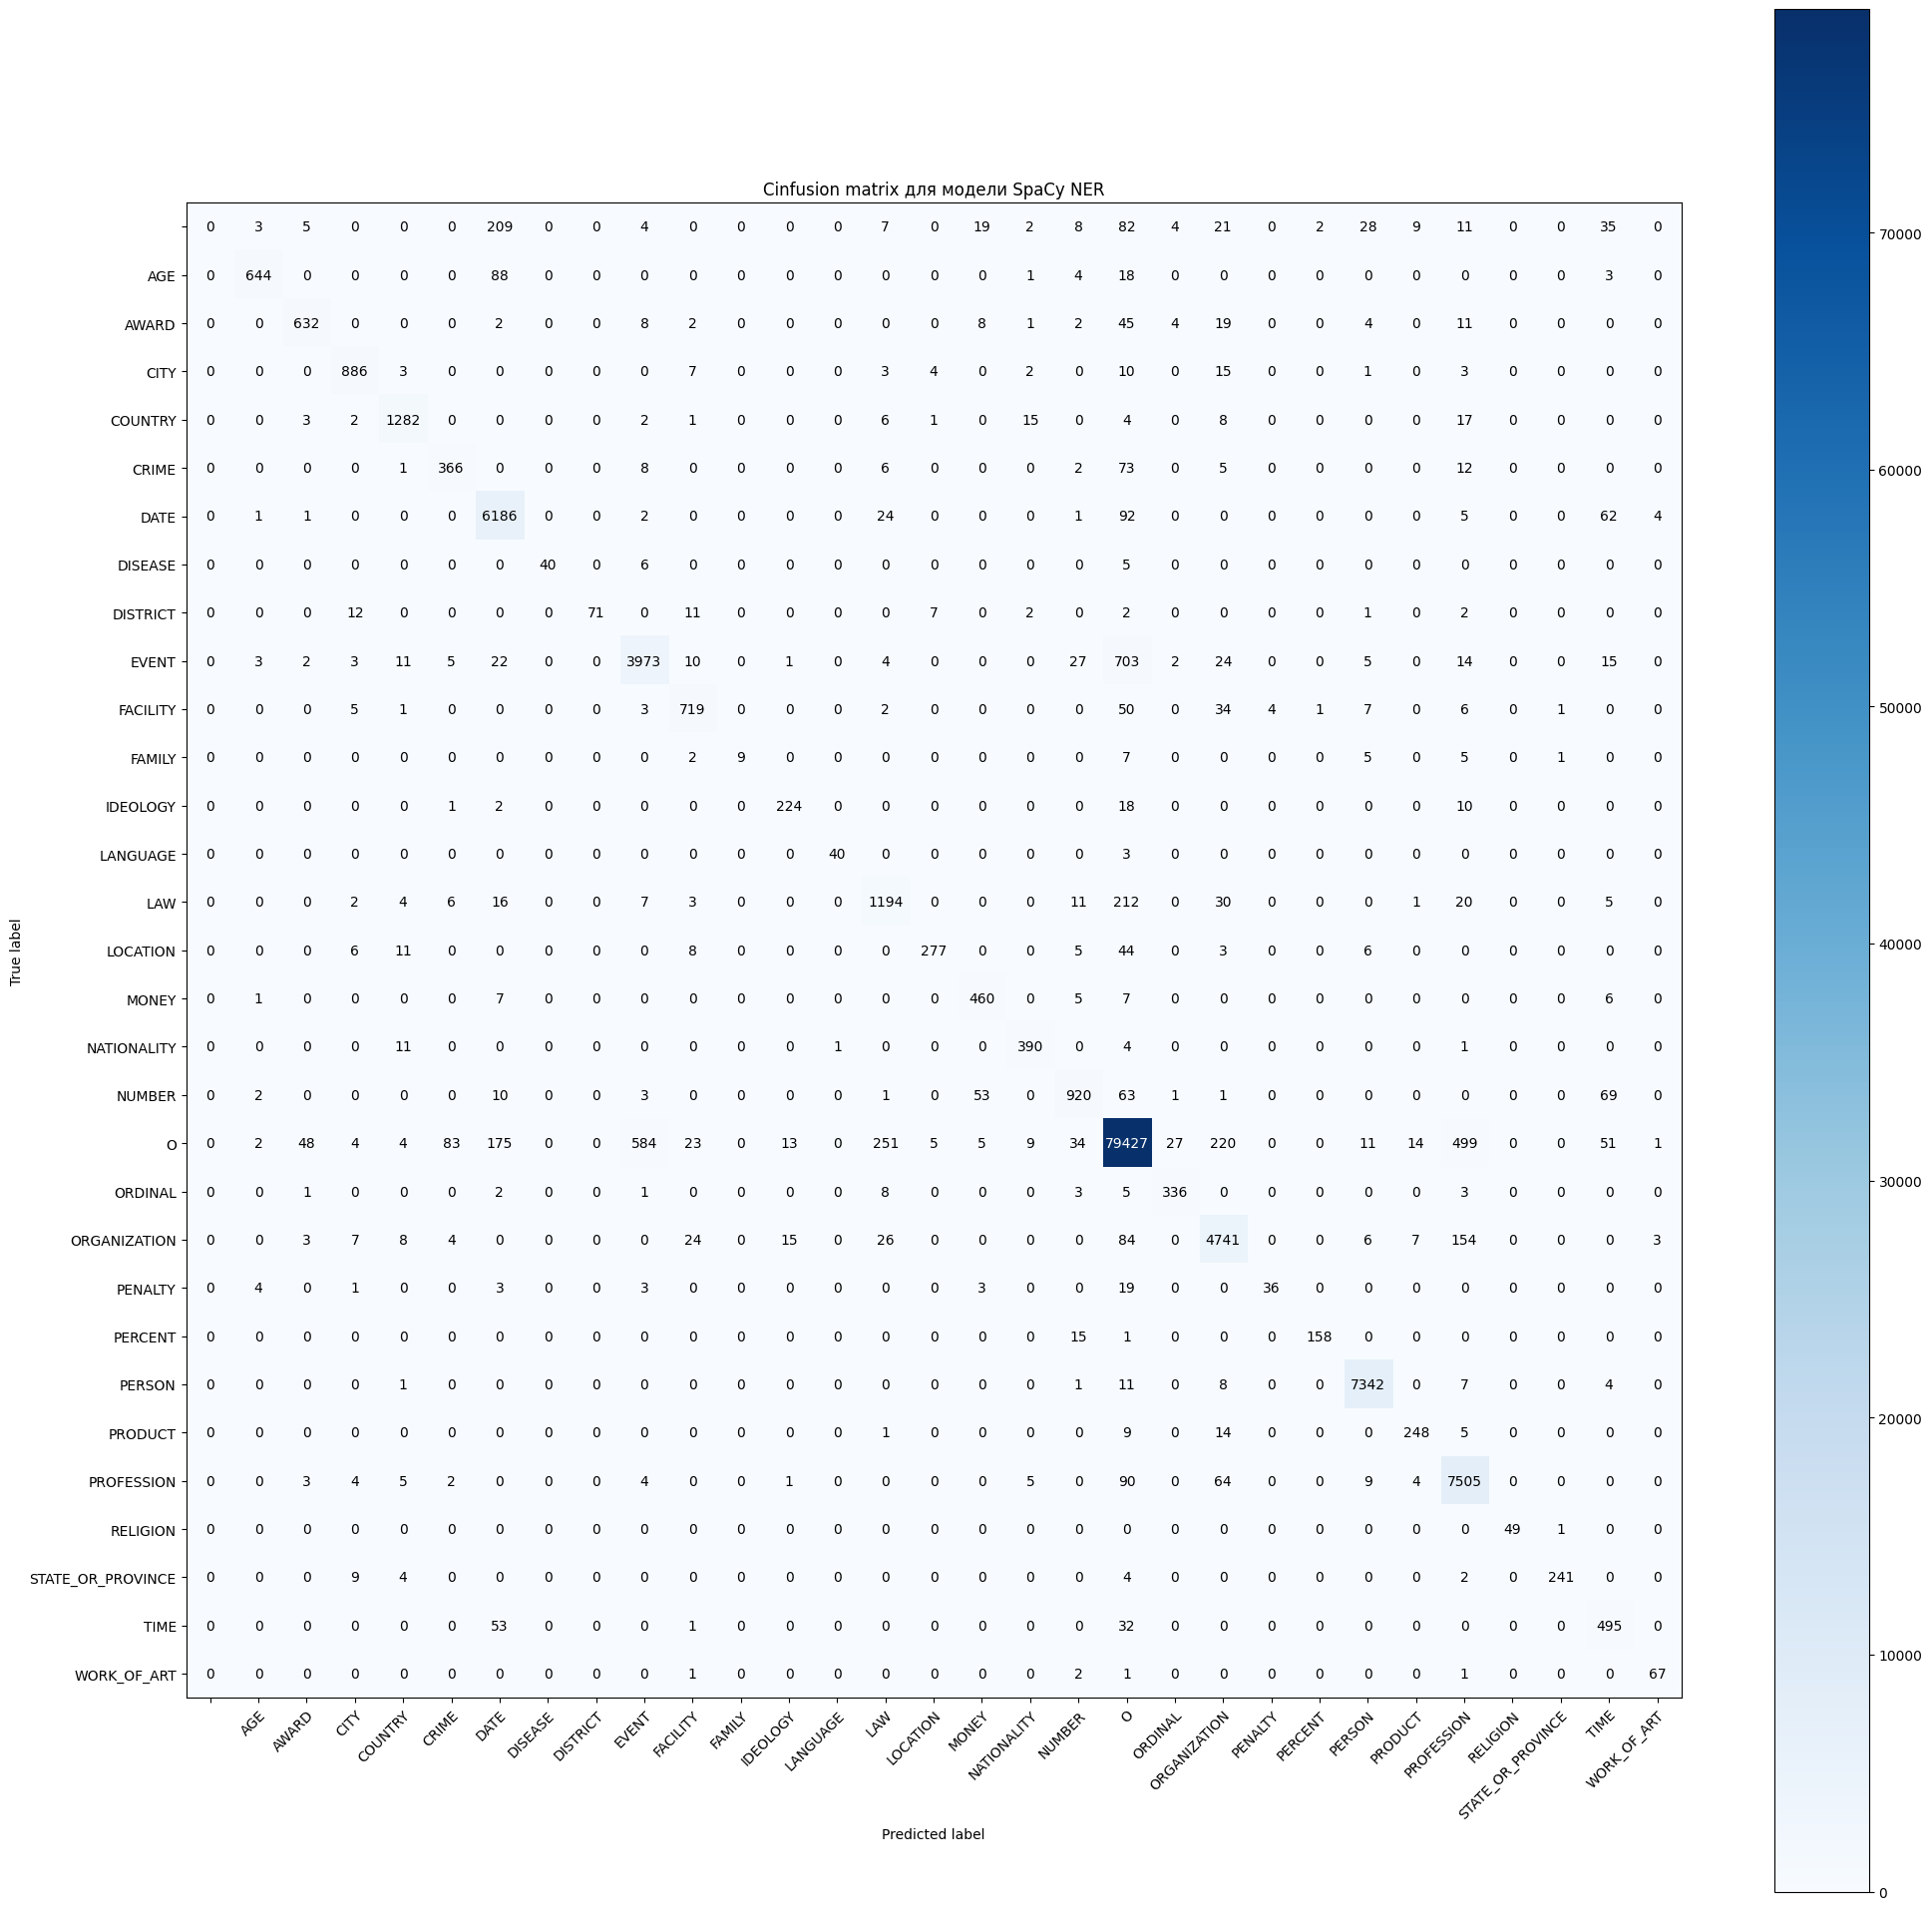

In [251]:
plot_confusion_matrix(runne_test, classes=get_dataset_labels(runne_test), normalize=False)

In [271]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

y_true, y_pred, classes = get_y_true_pred(runne_test)

print(f'Classes: {classes}')
print(f'Accuracy: {accuracy_score(y_true=y_true, y_pred=y_pred)}')
print(f'Precision: {precision_score(y_true=y_true, y_pred=y_pred, average='weighted', zero_division=1)}')
print(f'Recall {recall_score(y_true=y_true, y_pred=y_pred, average='weighted')}')
print(f'F1 {f1_score(y_true=y_true, y_pred=y_pred, average='weighted')}')

Classes: ['', 'AGE', 'AWARD', 'CITY', 'COUNTRY', 'CRIME', 'DATE', 'DISEASE', 'DISTRICT', 'EVENT', 'FACILITY', 'FAMILY', 'IDEOLOGY', 'LANGUAGE', 'LAW', 'LOCATION', 'MONEY', 'NATIONALITY', 'NUMBER', 'O', 'ORDINAL', 'ORGANIZATION', 'PENALTY', 'PERCENT', 'PERSON', 'PRODUCT', 'PROFESSION', 'RELIGION', 'STATE_OR_PROVINCE', 'TIME', 'WORK_OF_ART']
Accuracy: 0.9548340490428222
Precision: 0.9557463054328449
Recall 0.9548340490428222
F1 0.9530876726968391


In [272]:
import joblib

joblib.dump('spacy_model', 'spacy_model.joblib', compress=3)

['spacy_model.joblib']

In [275]:
trained_nlp_joblib = joblib.load('spacy_model.joblib')

trained_nlp_joblib = spacy.load(trained_nlp_joblib)

test_texts = [
    'Всем привет! Меня зовут Владислав Платонов и я учусть в Пермском филиале Национального исследовательского университета "Высшая школа экономики", сокращенно НИУ ВШЭ.',
    'Меня зовут Владислав и номер моей карты 1341 1242 1244 1244 она активна до 05/25.',
    '13 августа 1926 года',
    '13.06.1926',
    'Наиболее интересные для изучения годы, это: 1232, 1234, 2194 и 1284'
]

for text in test_texts:
    doc = trained_nlp_joblib(text)
    print(text)
    print('Entities', [(ent.text, ent.label_, ent.start_char, ent.end_char) for ent in doc.ents])
    print()

Всем привет! Меня зовут Владислав Платонов и я учусть в Пермском филиале Национального исследовательского университета "Высшая школа экономики", сокращенно НИУ ВШЭ.
Entities [('Владислав Платонов', 'PERSON', 24, 42), ('Пермском филиале Национального исследовательского университета "Высшая школа экономики"', 'ORGANIZATION', 56, 143), ('ВШЭ', 'ORGANIZATION', 160, 163)]

Меня зовут Владислав и номер моей карты 1341 1242 1244 1244 она активна до 05/25.
Entities [('Владислав', 'PERSON', 11, 20), ('1341 1242 1244 1244', 'DATE', 40, 59)]

13 августа 1926 года
Entities [('13 августа 1926 года', 'DATE', 0, 20)]

13.06.1926
Entities []

Наиболее интересные для изучения годы, это: 1232, 1234, 2194 и 1284
Entities [('1232, 1234, 2194 и 1284', 'DATE', 44, 67)]

